In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


doing preprocessing for removing one extra column

In [5]:
df.shape

(100, 4)

<h2> steps </h2>

 1. process + EDA features selection </br>
 2. Extract input and output cols </br>
 3. Scale the values </br>
 4. train the split</br>
 5. train the model </br>
 6. evaluate the model selection </br>
 7. deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
# preprocessing stage
df.iloc[: , 1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
# EDA
import matplotlib.pyplot as plt


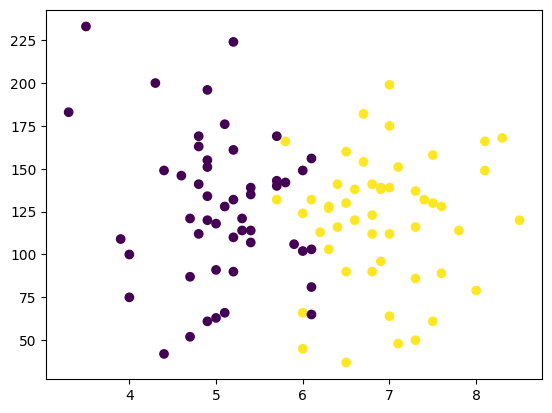

In [13]:
plt.scatter(df['cgpa'] , df['iq'] , c=df['placement'])

In [14]:
# features selection


In [15]:
# extract input and output  columns
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
x


,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [17]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
# train test split
from sklearn.model_selection import train_test_split

In [19]:
train_test_split(x,y, test_size=0.1)

[    Unnamed: 0  cgpa
 48          48   6.6
 49          49   5.4
 50          50   3.5
 74          74   6.7
 11          11   6.9
 ..         ...   ...
 18          18   4.0
 76          76   4.9
 32          32   7.0
 16          16   5.2
 56          56   6.1
 
 [90 rows x 2 columns],
     Unnamed: 0  cgpa
 67          67   5.0
 63          63   6.3
 26          26   7.0
 17          17   3.3
 52          52   7.0
 44          44   7.5
 38          38   6.5
 82          82   6.5
 60          60   6.9
 43          43   6.8,
 48    1
 49    0
 50    0
 74    1
 11    1
      ..
 18    0
 76    0
 32    1
 16    0
 56    0
 Name: placement, Length: 90, dtype: int64,
 67    0
 63    1
 26    1
 17    0
 52    1
 44    1
 38    1
 82    1
 60    1
 43    1
 Name: placement, dtype: int64]

In [20]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size = 0.1)

In [21]:
x_train

,Unnamed: 0,cgpa
74,74,6.7
27,27,6.0
82,82,6.5
88,88,4.4
66,66,6.9
...,...,...
65,65,8.1
45,45,6.0
22,22,4.9
76,76,4.9


In [22]:
# scaling value
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
x_test

array([[ 0.12616755,  2.10311753],
       [-1.34125814,  0.83216881],
       [ 1.06951264, -0.98347223],
       [ 0.79000298,  1.19529701],
       [-0.67742271,  1.46764317],
       [ 1.59359324, -1.52816453],
       [-1.02680978,  0.55982265],
       [-1.69064521, -0.07565171],
       [ 0.89481911, -1.07425428],
       [ 0.65024816, -1.80051069]])

in this i'm going to use logistic classifier

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [29]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [30]:
# evaluating model

In [34]:
y_pred=clf.predict(x_test)



In [33]:
y_test

,placement
53,1
11,1
80,0
72,1
30,1
95,0
20,1
1,0
75,0
68,0


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

1.0

In [39]:
# plot disition boundry
from mlxtend.plotting import plot_decision_regions

<Axes: >

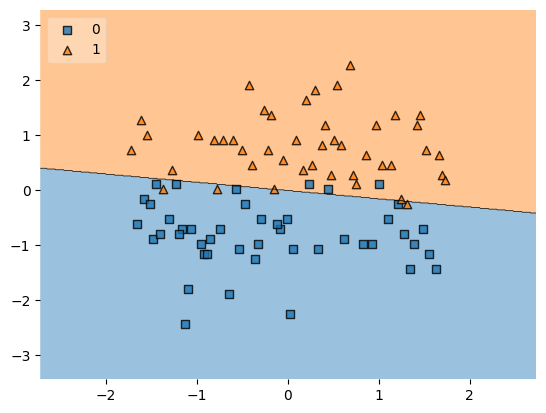

In [44]:
plot_decision_regions(x_train,y_train.values,clf, legend=2)

In [45]:
import pickle

In [46]:
pickle.dump(clf,open('model.pkl','wb'))